<h2 align='center'> Sales Analysis of a electronic Store <h2>
<h2 align='center'> FDS PROJECT <h2>
<BR>
<BR>
<BR>

<table align='left'>
    <tr >
        <td>Balasani Dheeraj Redddy</td>
        <td>AM.EN.U4CSE20115</td>
    </tr>
    <tr>
        <td>Vanguru Vekata Varun Kumar Reddy</td>
        <td>AM.EN.U4CSE20172</td>
    </tr>
    <tr>
        <td>Chinthakuntla Purushottam Reddy</td>
        <td>AM.EN.U4CSE20120</td>
    </tr>
    <tr>
        <td>S N V V S Gowtham Tadavarthy</td>
        <td>AM.EN.U4CSE20160</td>
    </tr>
    <tr>
        <td>Joshua Wilson Philip</td>
        <td>AM.EN.U4CSE20135</td>
    </tr>
    <tr>
        <td>Maddipati Umesh Chandra</td>
        <td>AM.EN.U4CSE20142</td>
    </tr>

</table>

#### our dataset that contains information about orders placed at a store or online retailer. The dataset includes several important fields, such as the order ID, product name, quantity, price, order date, and purchase address. These fields provide valuable information about the products that were purchased, when they were purchased, and where the purchase was made.In our  project, we use this dataset to perform a variety of analyses. we analyze the sales data to understand the most popular products, the busiest times of year, and the geographic distribution of purchases. and also used unsupervised ml algoithms in data to identify trends and patterns in customer behavior, such as the most common products that are purchased together,and which time of day is busy with customers

#### Import necessary libraries

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### we have sales data of each month so we Merging data from all months into one csv

In [2]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
all_data.shape

(186850, 6)

## Changing all columns data type from object to preferred types 

### Order Id -> int
### Product -> string 
### Quantity - int
### Price -> float 
### Purchase address -> string





### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

# Getting the count of empty cells in each column

In [6]:
mask = all_data.isna()
empty_cells_per_column = mask.sum()
print(empty_cells_per_column)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


### We don't have empty cells but we have a complete empty rows in our dataset so we removed the rows completely by dropna(how=all)

In [7]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### we have some unecssary string values in data column so we removed them

In [8]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### changing column types for better calculations

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Adding additional column (month) from date for better visualization

#### Add month column (method 1)

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add month column (method 2) : We changed Order Date column to datatime object using "to_datetime" from that we extracted month value

In [11]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Extracting the city and state from address for grouping orders

In [12]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA)


# Exploring and understanding the dataset

### Grouping the orders by month and getting statistical info of sales

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [14]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


range(1, 13)


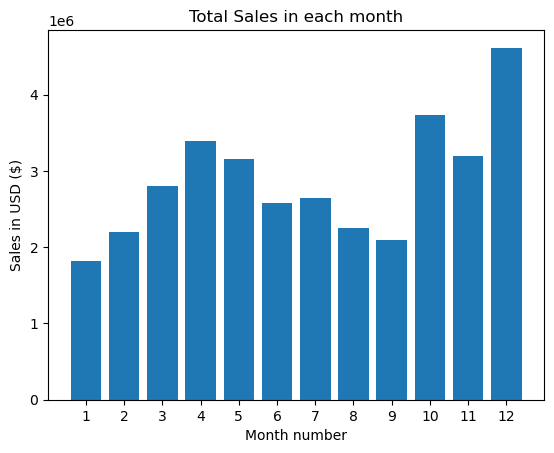

In [35]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)
plt.title("Total Sales in each month")
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



### Grouping the orders by city and getting sales info of every city

In [16]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


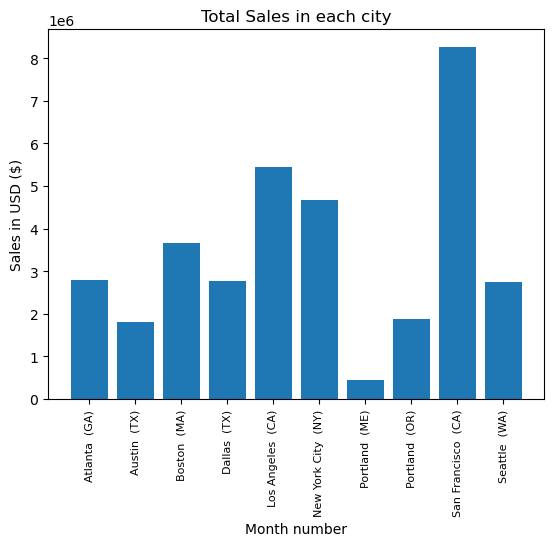

In [36]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]
plt.title("Total Sales in each city")
plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

## Finding the best time to advertise the product to reach most customers as per previous customer preferences

In [18]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,9,27,1


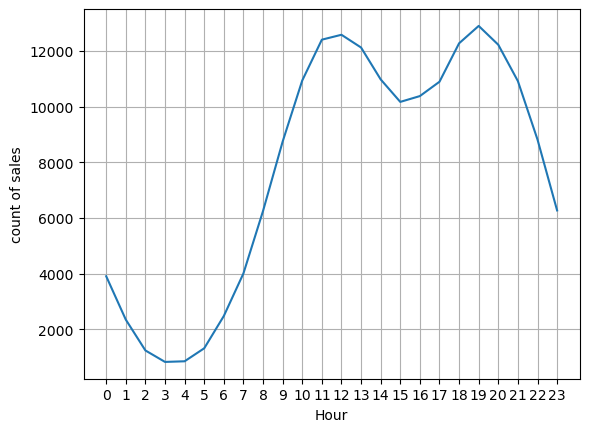

In [19]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Hour')
plt.ylabel('count of sales')
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Finding the most sold products together for showcasing them at the same place so that  customers may tend to buy the frequent items

In [20]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\dheer\AppData\Local\Temp\ipykernel_15768\4067726271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,City,Sales,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.99,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),600.00,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,4,Los Angeles (CA),11.95,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,4,Boston (MA),99.99,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


##  Useing all combination to count the frequently bought items under the same order

In [22]:

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Finding which product sold most bys using aggregate functions

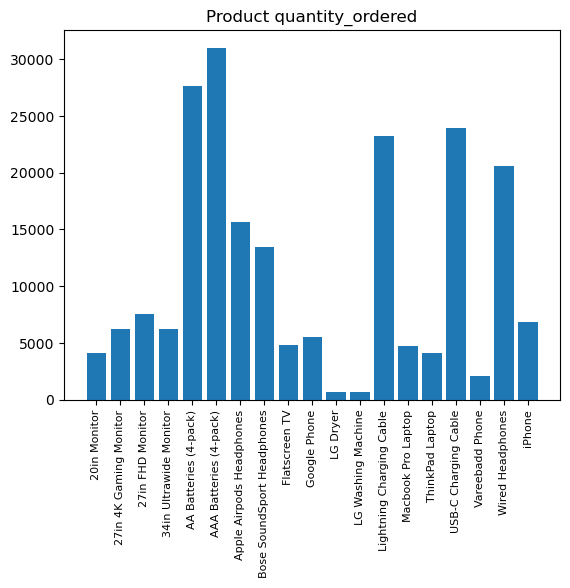

In [37]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
plt.title('Product quantity_ordered')
keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


## We added the price subplot to previous bar chart so we can understand the sales frequency of product depending on prices

C:\Users\dheer\AppData\Local\Temp\ipykernel_15768\2132649559.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\dheer\AppData\Local\Temp\ipykernel_15768\2132649559.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


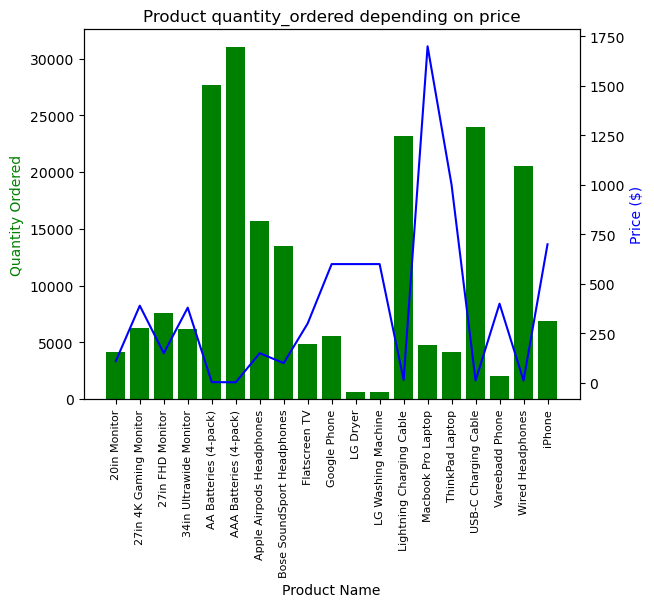

In [38]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
plt.title('Product quantity_ordered depending on price')
ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

## from the graph we get to know that most of our customers are midrange buyers so we can concentrate on mid range items on more for better sales

# UNSUPERVISED MACHINE LEARNING ALGORITHMS

# apriori algorithm to find most frequent items

### The Apriori algorithm is a popular algorithm for finding frequent itemsets in a dataset. It is a "bottom-up" approach, where frequent itemsets are found by combining smaller frequent itemsets. This approach is efficient because it reduces the search space by pruning infrequent itemsets. so we used to find frequent items bought

In [25]:
all_data['grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [26]:
df3 = all_data[['Order ID', 'grouped']].drop_duplicates()

In [27]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
lis = df3['grouped'].str.split(',').tolist()
te = TransactionEncoder()
te_ary = te.fit(lis).transform(lis)
te_ary
te_ary.astype("int")


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
import pandas as pd
clusterdf=pd.DataFrame(te_ary, columns=te.columns_)

In [29]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(clusterdf, use_colnames=True,  min_support=0.1)
frequent_itemsets

,support,itemsets
0,0.115122,(AA Batteries (4-pack))
1,0.115408,(AAA Batteries (4-pack))
2,0.121074,(Lightning Charging Cable)
3,0.122480,(USB-C Charging Cable)
4,0.105623,(Wired Headphones)


# "K-MEANS CLUSTERING" UNSUPERVISED ML ALGORITHM

## By using kmeans clustering we can cluster the counts of hours in your dataset, the results of the clustering can be used to identify groups of hours with similar counts from this clustering we can identify which hours of a day has high sales medium sales and low sales,by this we can adjust no of staff in particular times

In [31]:
from sklearn.cluster import KMeans
import numpy as np

# Extract the hour column and count the number of occurrences of each hour
hours, counts = np.unique(all_data['Hour'], return_counts=True)

# Fit the k-means model with 3 clusters
kmeans = KMeans(n_clusters=4).fit(counts.reshape(-1, 1))

# Get the cluster labels for each hour
clusters = kmeans.predict(counts.reshape(-1, 1))

# Print the cluster labels for each hour
print(clusters)

[2 0 0 0 0 0 0 2 2 1 1 3 3 3 1 1 1 1 3 3 3 1 1 2]


In [32]:
cluster_hours = dict(zip(hours, clusters))

# Print the cluster labels for each hour
for hour, cluster in cluster_hours.items():
    print(f'Hour {hour}: Cluster {cluster}')

Hour 0: Cluster 2
Hour 1: Cluster 0
Hour 2: Cluster 0
Hour 3: Cluster 0
Hour 4: Cluster 0
Hour 5: Cluster 0
Hour 6: Cluster 0
Hour 7: Cluster 2
Hour 8: Cluster 2
Hour 9: Cluster 1
Hour 10: Cluster 1
Hour 11: Cluster 3
Hour 12: Cluster 3
Hour 13: Cluster 3
Hour 14: Cluster 1
Hour 15: Cluster 1
Hour 16: Cluster 1
Hour 17: Cluster 1
Hour 18: Cluster 3
Hour 19: Cluster 3
Hour 20: Cluster 3
Hour 21: Cluster 1
Hour 22: Cluster 1
Hour 23: Cluster 2


### below graph show four clusters of hours
#### hour(1-6) low sales cluster
#### hour(7,8,23,23) average sales cluster
#### hour(9,10,14,15,16,17)above average sales cluster
#### hour(11,12,13,18,19,20)high sales cluster

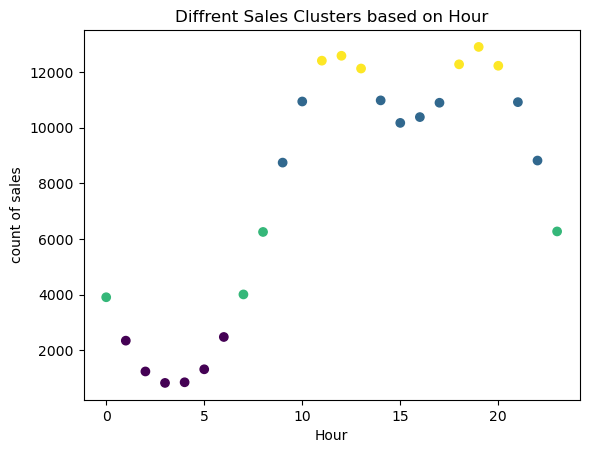

In [39]:
plt.scatter(hours, counts, c=clusters)
plt.title("Diffrent Sales Clusters based on Hour")
plt.xlabel('Hour')
plt.ylabel('count of sales')
plt.show()